# Data Wrangling

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

In [4]:
with pd.option_context('display.max_columns', None):
    display(df.head())

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irrespon

## Finding and removing duplicates

In [5]:
# Finding duplicates 
print(df.duplicated().sum())

154


In [6]:
# Removing duplicates
df.drop_duplicates(inplace=True)
#print(df.duplicated().sum()) #uncomment to check if the duplicated row removed 

## Finding Missing values

In [7]:
print(f'{"Column Name":<25} {"Missing Value":<15} {"Datatype":<10}')
for column in df.columns:
    print(f'{column:<25}{df[column].isnull().sum():<15}{df[column].dtypes}<10')

Column Name               Missing Value   Datatype  
Respondent               0              int64<10
MainBranch               0              object<10
Hobbyist                 0              object<10
OpenSourcer              0              object<10
OpenSource               81             object<10
Employment               0              object<10
Country                  0              object<10
Student                  51             object<10
EdLevel                  112            object<10
UndergradMajor           737            object<10
EduOther                 164            object<10
OrgSize                  96             object<10
DevType                  65             object<10
YearsCode                9              object<10
Age1stCode               13             object<10
YearsCodePro             16             object<10
CareerSat                0              object<10
JobSat                   1              object<10
MgrIdiot                 493            object<1

## Imputing missing values

### 1. Imputing the empty rows in the column with the value that is the majority.

In [8]:
#desciding on the columns that would be replaced by the majority 
# List to store the names of columns that satisfy the specified conditions
Listt = []
total_entries = df.shape[0] # Total number of entries in the column (including missing values)
for column in df.columns:
    # Check if the column satisfies the following conditions:
    # 1. The column's data type is 'object' (categorical or string data).
    # 2. The column contains at least one missing value.
    # 3. The column has fewer than 17 unique values (indicating limited categories).
    # 4. The mode (most frequent value) contributes to more than 50% of all entries in the column,including missing values.
    if (
        df[column].dtypes == object 
        and df[column].isnull().sum() > 0 
        and df[column].nunique() < 17 
        and (df[column].value_counts().iloc[0] /total_entries)> 0.5
        and (df[column].value_counts().iloc[1] /total_entries)< 0.4
    ):
        # Add the column name to the list as it meets all the conditions
        Listt.append(column)
        # Uncomment the following lines to check the mode distribution and null counts:
        # print(f'{column}: {df[column].value_counts()}')  # Displays the value counts for the column
        # print(f'{column:<25}{df[column].isnull().sum():<15}')  # Displays the column name and null count
        df[column] = df[column].fillna(df[column].mode()) # filling the empty row with the most frequent value 

### 2. Imputing the empty rows in the column with the value that is the Average.

In [9]:
converted_comp_mean=df['ConvertedComp'].mean()

In [10]:
df.loc[df['CompTotal'].isnull() & df['ConvertedComp'].isnull(), 'ConvertedComp'] = converted_comp_mean

## Determining how the data is distributed


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.
This assumes 12 working months and 50 working weeks.

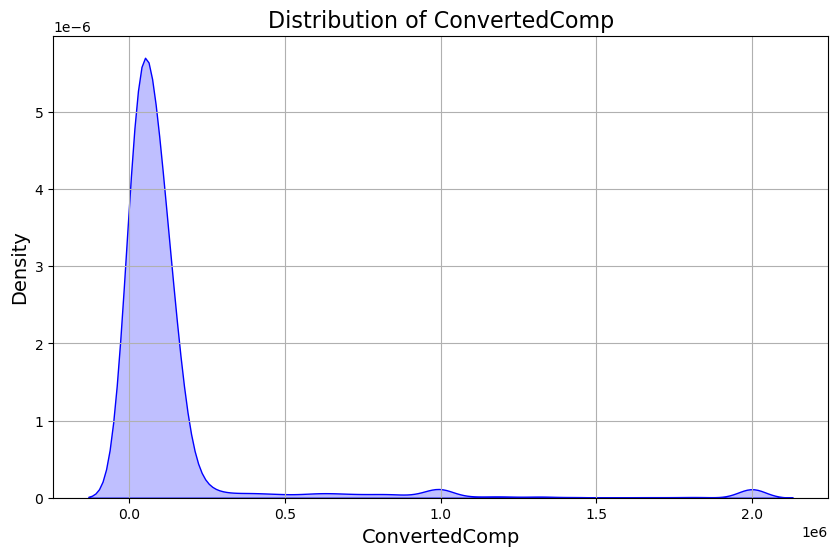

In [12]:
# Plot the distribution curve
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'].dropna(), color='blue', fill=True)
plt.title('Distribution of ConvertedComp', fontsize=16)
plt.xlabel('ConvertedComp', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

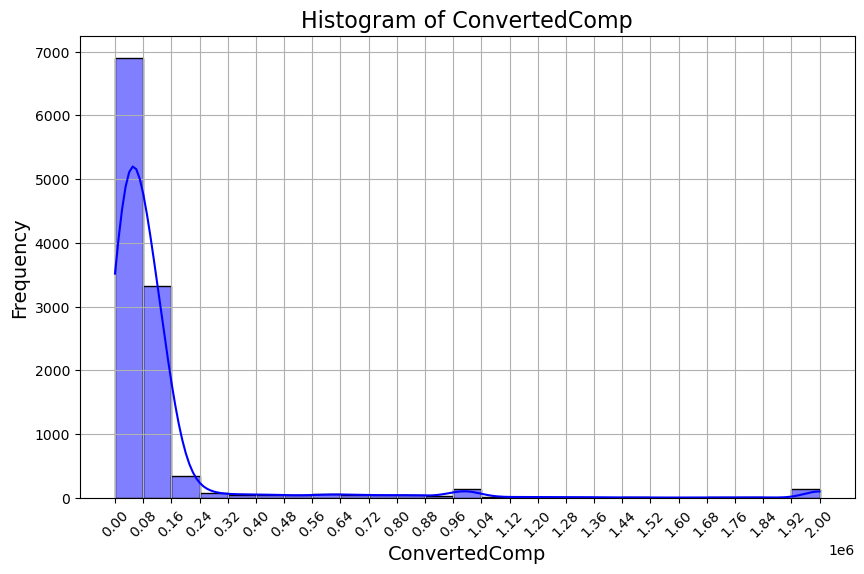

In [13]:
count, bin_edges = np.histogram(df['ConvertedComp'].dropna(), 25)
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), bins=25, color='blue',kde=True)
plt.title('Histogram of ConvertedComp', fontsize=16)
plt.xlabel('ConvertedComp', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bin_edges, rotation=45)
plt.grid(True)
plt.show()

In [14]:
df['ConvertedComp'].describe()

count    1.139100e+04
mean     1.315967e+05
std      2.841248e+05
min      0.000000e+00
25%      2.898500e+04
50%      6.301600e+04
75%      1.150000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [57]:
df.groupby('Gender')['ConvertedComp'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Man,10473.0,133540.567865,288214.918854,0.0,28920.0,63016.0,116000.00000,2000000.0
"Man;Non-binary, genderqueer, or gender non-conforming",26.0,65976.038462,38259.050986,15156.0,37809.0,59520.0,87550.50000,170000.0
"Non-binary, genderqueer, or gender non-conforming",63.0,202430.506770,408742.685875,3144.0,40192.5,68745.0,125844.00000,2000000.0
Woman,731.0,103272.238091,212406.370431,0.0,28386.0,61071.0,110000.00000,2000000.0
Woman;Man,9.0,59547.718138,60009.326743,5040.0,18852.0,25887.0,131596.73162,150000.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2.0,30244.000000,35066.839493,5448.0,17846.0,30244.0,42642.00000,55040.0
"Woman;Non-binary, genderqueer, or gender non-conforming",14.0,76109.142857,57613.935850,5160.0,28903.5,65535.5,119529.25000,180000.0


In [15]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

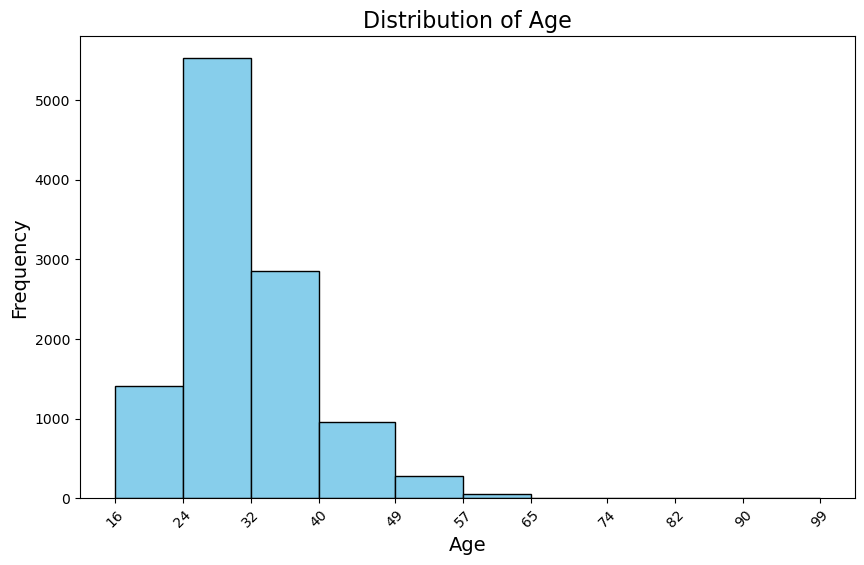

In [38]:
bin_edges = np.linspace(df['Age'].min(), df['Age'].max(), 10 + 1).astype(int)
#count, bin_edges = np.histogram(df['Age'].dropna(),bins=bin_edges)
df['Age'].plot.hist(figsize=(10,6),color='skyblue',edgecolor='black',bins=bin_edges)
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(bin_edges, rotation=45)  
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Finding outliers


#### Display box plots to visualize the distribution and potential outliers of 'Age' and 'ConvertedComp' column

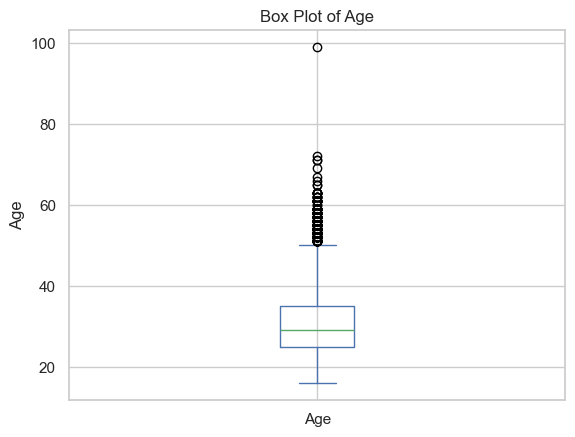

In [60]:
## Plotting 'Age' box plot
df['Age'].plot.box()
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

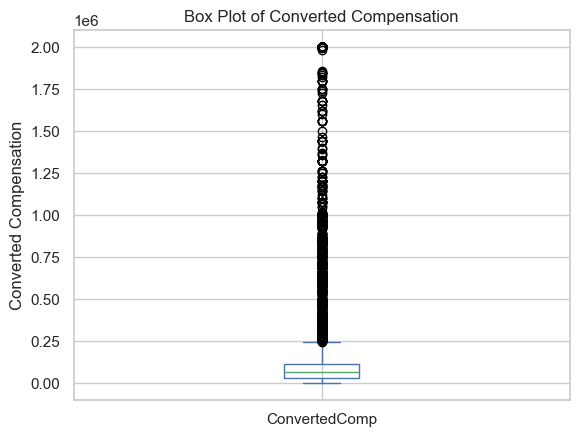

In [61]:
# Plotting 'ConvertedComp' box plot
df['ConvertedComp'].plot.box()
plt.title('Box Plot of Converted Compensation')
plt.ylabel('Converted Compensation')
plt.show()

In [62]:
# Calculating the interquartile range (IQR) for 'ConvertedComp'
q1=df['ConvertedComp'].quantile(0.25)
q3=df['ConvertedComp'].quantile(0.75)
iqr=q3-q1
print(f'Interquartile Range (IQR): {iqr}')

Interquartile Range (IQR): 86015.0


In [47]:
# Determining the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 *iqr
print(f'lower_bound = q1 - 1.5 * iqr = {lower_bound} and upper_bound = q3 + 1.5 *iqr = {upper_bound}')

lower_bound = q1 - 1.5 * iqr = -100037.5 and upper_bound = q3 + 1.5 *iqr = 244022.5


In [63]:
# Counting the number of outliers above the upper bound
outlier_count=df['ConvertedComp'][df['ConvertedComp']>upper_bound].count()
print(f'Number of outliers above the upper bound: {outlier_count}')

Number of outliers above the upper bound: 811


In [64]:
# Filtering out outliers and creating a new DataFrame
df_new=df[df['ConvertedComp']<=upper_bound]
df_new.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10580.000000,9.771000e+03,10580.000000,10462.000000,8337.000000,10311.000000
mean,12473.705293,7.223455e+05,66419.298571,41.903580,4.806168,30.667035
std,7239.575621,7.163343e+06,47439.809954,24.239948,4.615142,7.368687
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6240.250000,2.000000e+04,26867.500000,40.000000,2.000000,25.000000
50%,12466.500000,6.400000e+04,57744.000000,40.000000,4.000000,29.000000
75%,18780.250000,1.200000e+05,100000.000000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,241112.000000,1012.000000,99.000000,99.000000


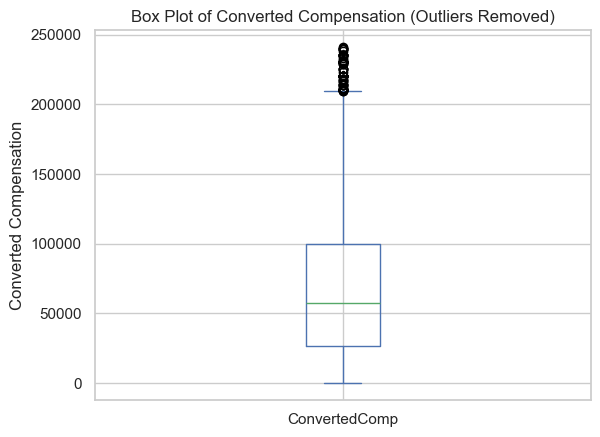

In [65]:
df_new['ConvertedComp'].plot.box()
plt.title('Box Plot of Converted Compensation (Outliers Removed)')
plt.ylabel('Converted Compensation')
plt.show()

### Finding correlation

In [53]:
numerical_df = df_new.select_dtypes(include=['number'])
print("Numerical columns:", numerical_df.columns)


Numerical columns: Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='object')


In [54]:
# your code goes here
numerical_df.corr()['Age']

Respondent       0.001177
CompTotal        0.006449
ConvertedComp    0.337326
WorkWeekHrs      0.037813
CodeRevHrs      -0.019021
Age              1.000000
Name: Age, dtype: float64

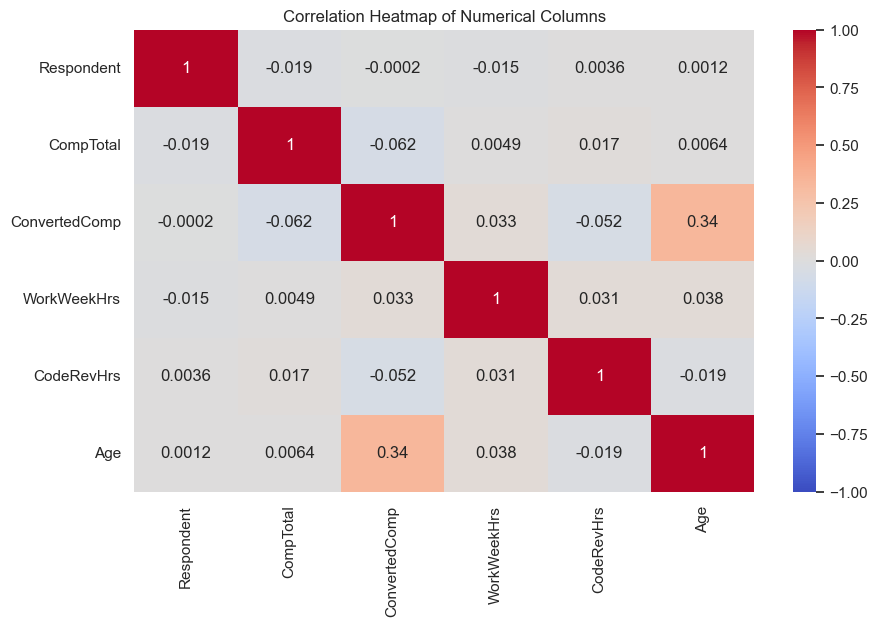

In [66]:
# Plotting the correlation heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()